## Objective

Let's work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

**Dataset description:**
This dataset was derived and simplified for learning purposes. It includes the usage behaviour of about 9000 active credit card holders during 6 months. This case requires the development of a customer segmentation to define a marketing strategy.

**Columns explanation**

* CUST_ID: Identification of Credit Card holder (Categorical)
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from account
* CASH_ADVANCE: Cash in advance given by the user
* CREDIT_LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by user 

**Instructions**
1. Import your data and perform the basic data exploration phase
2. Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
3. Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base to 'PURCHASES' and 'credit limit')
4. Perform partitional clustering using the K-means algorithm. Then, plot the clusters
5. Find the best k value and plot the clusters again.
6. Interpret the results

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [6]:
credit_card = pd.read_csv("C:/Users/user/Downloads/Credit_card_dataset.csv")
credit_card

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


In [7]:
credit_card.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [8]:
credit_card.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


## Handling Missing Values

In [9]:
credit_card['CREDIT_LIMIT'].fillna(credit_card['CREDIT_LIMIT'].median(), inplace=True)

## Outliers

In [10]:
from scipy.stats import zscore
credit_card = credit_card[(np.abs(zscore(credit_card[['PURCHASES', 'CREDIT_LIMIT']])) < 3).all(axis=1)]

# Scaling

In [11]:
scaler = StandardScaler()
card_scaled = scaler.fit_transform(credit_card[['PURCHASES', 'CREDIT_LIMIT']])


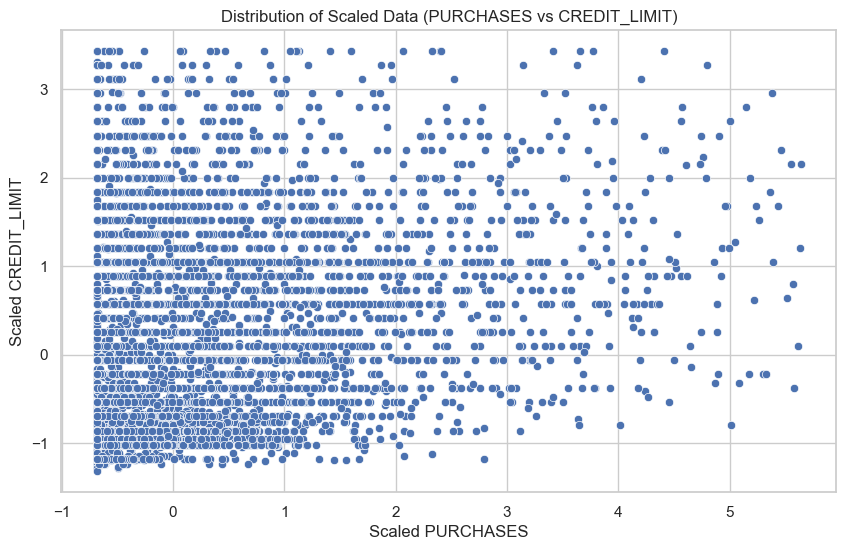

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=card_scaled[:, 0], y=card_scaled[:, 1])
plt.title("Distribution of Scaled Data (PURCHASES vs CREDIT_LIMIT)")
plt.xlabel("Scaled PURCHASES")
plt.ylabel("Scaled CREDIT_LIMIT")
plt.show()

# Hierarchical Clustering

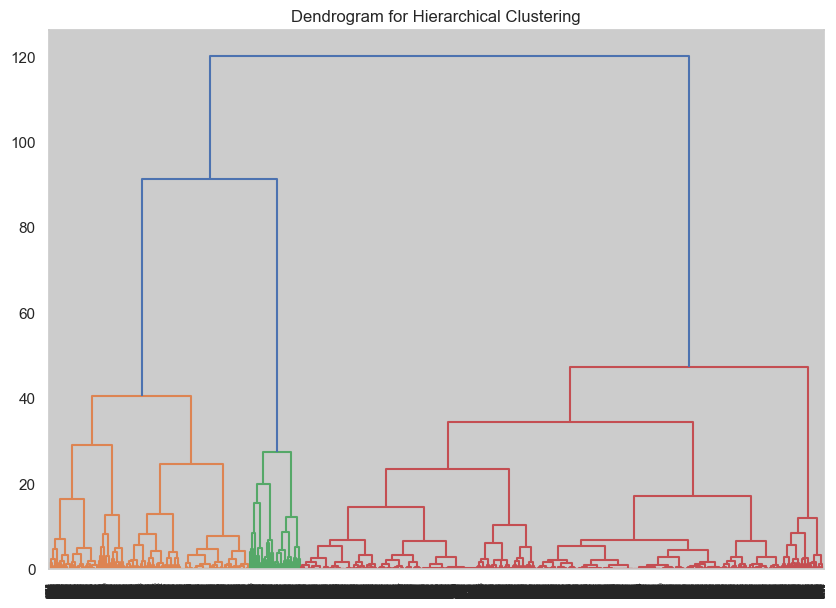

In [13]:
Den_gram = linkage(card_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Den_gram, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

# K-Means Clustering with the Elbow Method to find the best k

In [15]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(card_scaled)
    sse.append(kmeans.inertia_)

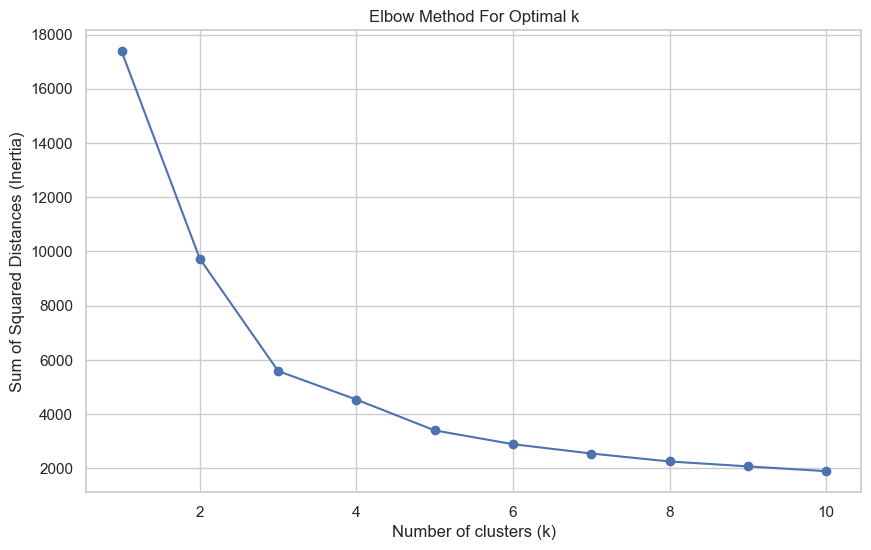

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()

In [17]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(card_scaled)


In [19]:
clusters

array([0, 2, 2, ..., 0, 0, 0])

In [20]:
# Adding clusters to the original credit card dataframe
credit_card.loc[:, 'Cluster'] = clusters

# Plotting the clusters

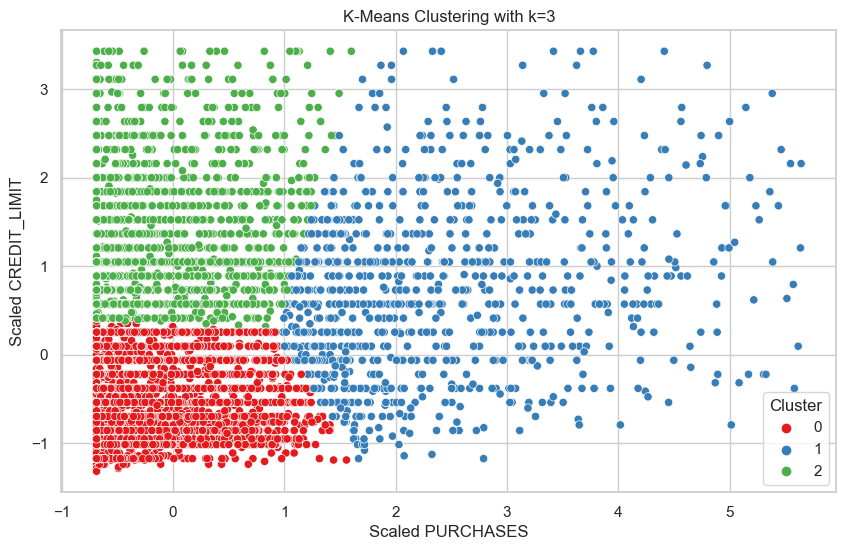

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=card_scaled[:, 0], y=card_scaled[:, 1], hue=clusters, palette="Set1")
plt.title(f'K-Means Clustering with k={k}')
plt.xlabel("Scaled PURCHASES")
plt.ylabel("Scaled CREDIT_LIMIT")
plt.legend(title="Cluster")
plt.show()

In [22]:
silhouette_avg = silhouette_score(card_scaled, clusters)
print(f'Silhouette Score for k={k}: {silhouette_avg}')


Silhouette Score for k=3: 0.5380401174094854


The **Silhouette Score** is a measure of cluster quality, ranging from -1 to 1. It evaluates how well data points fit within their assigned clusters compared to other clusters. A score of **+1** indicates well-separated and cohesive clusters, **0** suggests overlapping clusters, and **-1** indicates potential misclassification.

A **Silhouette Score of 0.538** suggests that the clustering is reasonably good, with clusters being fairly well separated, though some overlap or boundary points may exist. Scores above **0.5** are generally acceptable, indicating a decent level of cohesion and separation in the clustering.